# Simulating Your Income
By: Bethany Bailey

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## Part 1

In [2]:
def find_incomes(init_income, mu, sigma):
    '''
    Given an initial income and a mean and standard deviation for the
    error term, calculate an array of incomes for 10,000 simulation over
    a 40 year period.
    '''
    np.random.seed(500)
    
    # Create a matrix of normally distributed errors.
    errors = np.random.normal(mu, sigma, (40, 10000))

    # Create a matrix of zeros with the correct dimensions.
    poten_income_mat = np.zeros((40, 10000))
    
    # Fill the first row of that matrix (year 1).
    poten_income_mat[0, :] = np.log(init_income) + errors[0, :]
    
    # Fill the rest of the matrix using the model.
    for y in range(1,40):
        poten_income_mat[y, :] = ((1.0 - 0.2) * (math.log(init_income) + \
                                (0.03 * float(y - 0)))) + (0.2 * \
                                poten_income_mat[y - 1, :]) + errors[y, :]
    poten_income_mat = np.exp(poten_income_mat)
    
    return poten_income_mat

Text(0,0.5,'Annual Income (\\$s)')

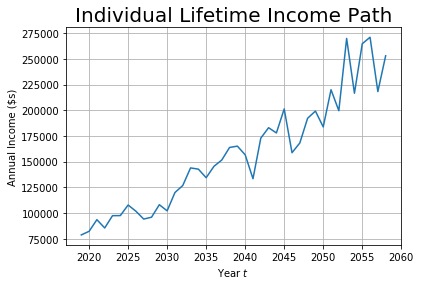

In [3]:
# Call the function.
mat_1 = find_incomes(80000.0, 0, 0.1)

# Plot the graph for individual 10.
%matplotlib inline
year_vec = np.arange(2019, 2059)
individual = 10
fig, ax = plt.subplots()
plt.plot(year_vec, mat_1[:, individual])
plt.grid(b=True, which='major', linestyle='-')
plt.title('Individual Lifetime Income Path', fontsize=20)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income (\$s)')

## Part 2

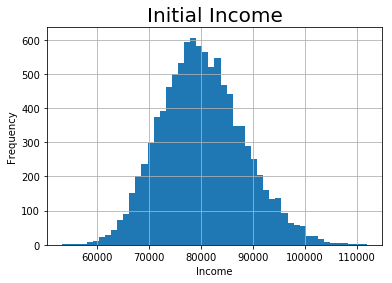

In [4]:
# Plot a histogram with 50 bins of initial income (year 2019).
%matplotlib inline
initial_income = mat_1[0, :]
plt.hist(initial_income, bins=50)
plt.grid(True)
plt.title('Initial Income', fontsize=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [5]:
over_100k = initial_income[initial_income >= 100000].shape[0]/100
print("The percentage of individuals who will make over $100,000 \
in the first year is", over_100k, "%.")
under_70k = initial_income[initial_income <= 70000].shape[0]/100
print("The percentage of individuals who will less than $70,000 \
in the first year is", under_70k, "%.")
print("This distribution is normally distributed.")

The percentage of individuals who will make over $100,000 in the first year is 1.06 %.
The percentage of individuals who will less than $70,000 in the first year is 9.42 %.
This distribution is normally distributed.


## Part 3

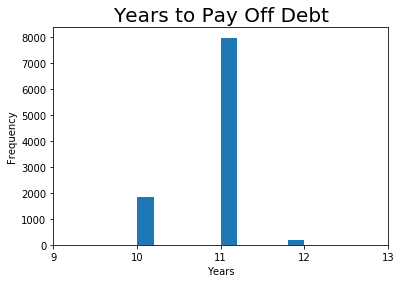

In [6]:
def find_debt_years(mat):
    '''
    Given a matrix of incomes, find the amount of years it will take to pay off 
    $95,000 in debt.
    '''
    # Calc 10% of each year's income.
    ten_per_mat = np.zeros((40, 10000))
    ten_per_mat[0, :] = mat[0, :] * 0.1

    # Accumulate the sum of those values over 40 years for each trial.
    for year in range(1, 40):
        ten_per_mat[year, :] = mat[year, :] * 0.1 + ten_per_mat[year - 1, :]

    # For each trial, find the year that you have accumulated at least 
    # $95,000 and store it in a list.
    year_list = []
    for trial in range(10000):
        payoff_acc = ten_per_mat[:, trial]
        payoff_acc.reshape(1, 40)
        year_paid = 41 - payoff_acc[payoff_acc >= 95000].shape[0]
        year_list.append(year_paid)
    
    return year_list

# Call the function.
year_list_1 = find_debt_years(mat_1)

# Graph the histogram.
%matplotlib inline
plt.hist(year_list_1)
plt.title('Years to Pay Off Debt', fontsize=20)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.xticks(range(9, 14))
plt.show()

In [7]:
# Find the number of trials in the list where you pay off your debt in 
# 10 years or less.

ten_years = 0
for trial in year_list_1:
    if trial <= 10:
        ten_years += 1

# Find the percentage.
ten_years = ten_years / 100
print("You will pay off your debt in less than 10 years", ten_years, "% of the time.")

You will pay off your debt in less than 10 years 18.37 % of the time.


## Part 4

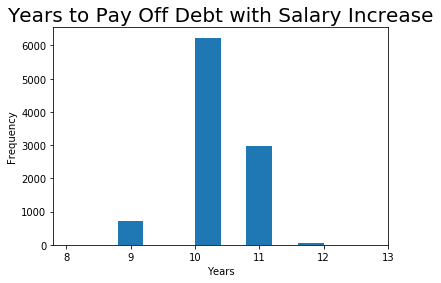

In [10]:
# Find income matrix with the new parameters.
mat_2 = find_incomes(85000.0, 0, 0.15)

# Call the function with the new matrix.
year_list_2 = find_debt_years(mat_2)

# Graph the histogram.
%matplotlib inline
plt.hist(year_list_2)
plt.title('Years to Pay Off Debt with Salary Increase', fontsize=20)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.xticks(range(8, 14))
plt.show()

In [9]:
# Find the number of trials in the list where you pay off your debt in 
# 10 years or less.
ten_years = 0
for trial in year_list_2:
    if trial <= 10:
        ten_years += 1

# Find the percentage.
ten_years = ten_years / 100
print("With the salary increase, you will pay off your debt in less than 10 years", ten_years, "% of the time.")

With the salary increase, you will pay off your debt in less than 10 years 69.61 % of the time.
